In [11]:
import pandas as pd

air_quality_df = pd.read_csv('data/datathon24_parte1/air_quality_gijon.csv')
meteo_df = pd.read_csv('data/datathon24_parte1/meteo_gijon.csv')
mobility_df = pd.read_csv('data/datathon24_parte1/movility_gijon.csv')


merged_df = air_quality_df.merge(meteo_df, on='date', how='outer').merge(mobility_df, on='date', how='outer')

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 1826 non-null   object 
 1   SO2_OesteAvdaArgentina               1826 non-null   float64
 2   SO2_EsteAvdaCastilla                 1826 non-null   float64
 3   NO2_OesteAvdaArgentina               1826 non-null   float64
 4   NO_EsteAvdaCastilla                  1826 non-null   float64
 5   NO2_OesteAvdaArgentina.1             1826 non-null   float64
 6   NO2_EsteAvdaCastilla                 1826 non-null   float64
 7   CO_OesteAvdaArgentina                1826 non-null   float64
 8   CO_EsteAvdaCastilla                  1826 non-null   float64
 9   PM10_OesteAvdaArgentina              1826 non-null   float64
 10  PM10_EsteAvdaCastilla                1826 non-null   float64
 11  O3_OesteAvdaArgentina         

In [13]:
merged_df.to_csv('data/datathon24_parte1/merged_gijon.csv', index=False)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate all mobility (traffic) columns into a single variable
merged_df["total_traffic"] = merged_df.filter(like="trafico").sum(axis=1)

# Step 2: Select the specified air quality, meteorological, and the aggregated mobility variable for correlation analysis
variables_of_interest = [
    "SO2_GijonGlobal",
    "NO_GijonGlobal",
    "NO2_GijonGlobal",
    "CO_GijonGlobal",
    "PM10_GijonGlobal",
    "O3_GijonGlobal",
    
    "tmed_Gijon",
    "prec_Gijon",
    "sol_Gijon",
    "presMin_Gijon",
    "presMax_Gijon",
    "velmedia_Gijon",
    "racha_Gijon",
    
    "total_traffic",
]

# Creating a subset for the correlation analysis
subset_df = merged_df[variables_of_interest]

# Step 3: Calculate the Pearson correlation coefficient
correlation_matrix = subset_df.corr()

# Display the correlation matrix focusing on the air quality variables
correlation_matrix.loc[
    [
        "SO2_GijonGlobal",
        "NO_GijonGlobal",
        "NO2_GijonGlobal",
        "CO_GijonGlobal",
        "PM10_GijonGlobal",
        "O3_GijonGlobal",
    ]
]

,SO2_GijonGlobal,NO_GijonGlobal,NO2_GijonGlobal,CO_GijonGlobal,PM10_GijonGlobal,O3_GijonGlobal,tmed_Gijon,prec_Gijon,sol_Gijon,presMin_Gijon,presMax_Gijon,velmedia_Gijon,racha_Gijon,total_traffic
SO2_GijonGlobal,1.000000,0.211349,0.292682,0.314860,0.235856,-0.086423,-0.157384,0.002325,0.004044,-0.055130,0.004144,0.154683,0.176065,0.078419
NO_GijonGlobal,0.211349,1.000000,0.706639,0.348052,0.444507,-0.353945,-0.275549,-0.106956,0.076020,0.070093,0.100735,-0.216986,-0.134608,0.301941
NO2_GijonGlobal,0.292682,0.706639,1.000000,0.368917,0.428865,-0.149500,-0.423025,0.010872,-0.026180,-0.012015,0.056292,-0.167971,-0.043141,0.354328
CO_GijonGlobal,0.314860,0.348052,0.368917,1.000000,0.228294,-0.180355,-0.172095,0.007511,0.025357,-0.014891,0.027546,-0.035144,0.004217,0.123233
PM10_GijonGlobal,0.235856,0.444507,0.428865,0.228294,1.000000,-0.145843,-0.063750,-0.050342,0.023138,-0.006829,0.020839,-0.088846,-0.017171,0.058025
O3_GijonGlobal,-0.086423,-0.353945,-0.149500,-0.180355,-0.145843,1.000000,0.066526,-0.042327,0.270791,-0.074617,-0.090605,0.195666,0.171060,-0.122897


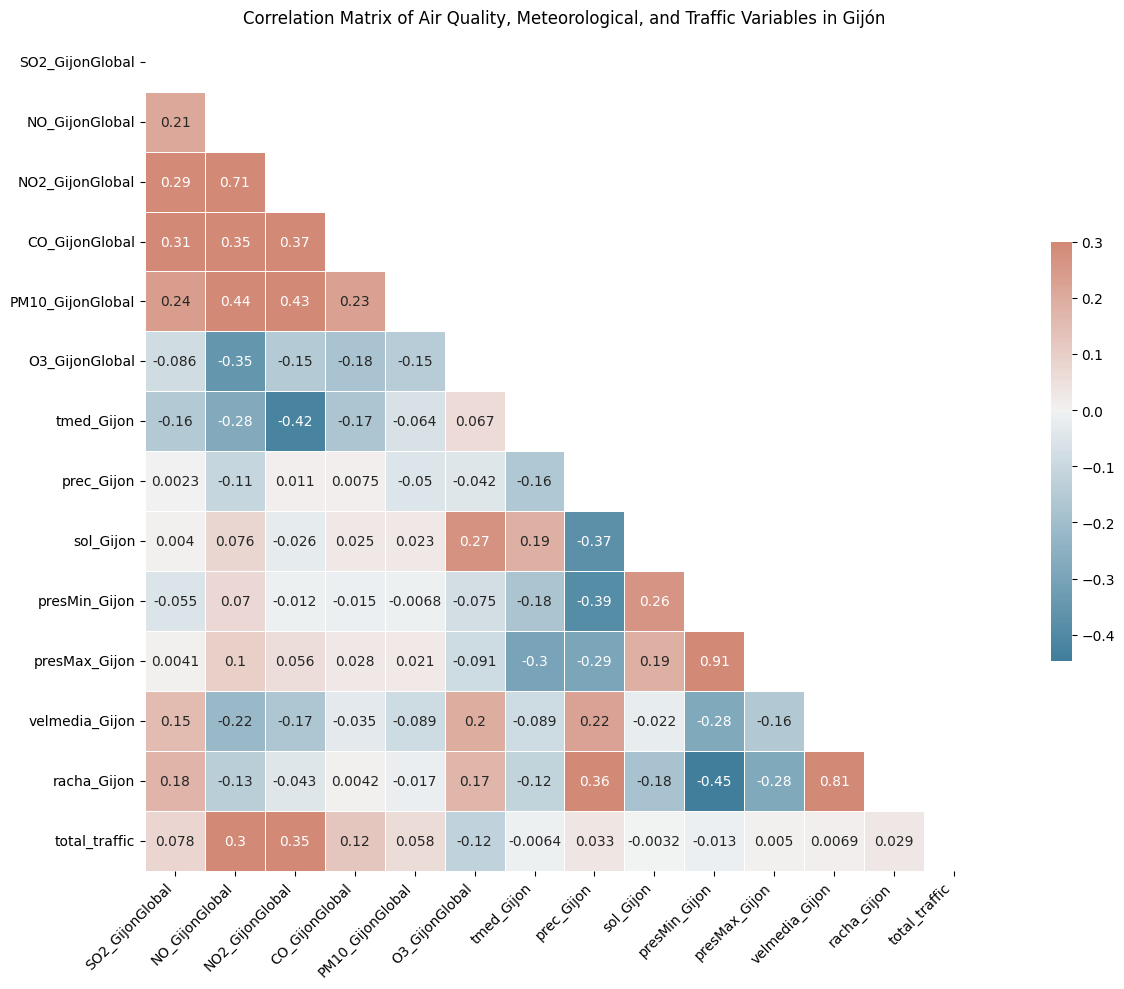

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix for the selected variables
correlation_matrix = subset_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix of Air Quality, Meteorological, and Traffic Variables in Gijón')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Nota: No utilizar monoxido de carbono

KeyError: 'velmedia_Gijon'

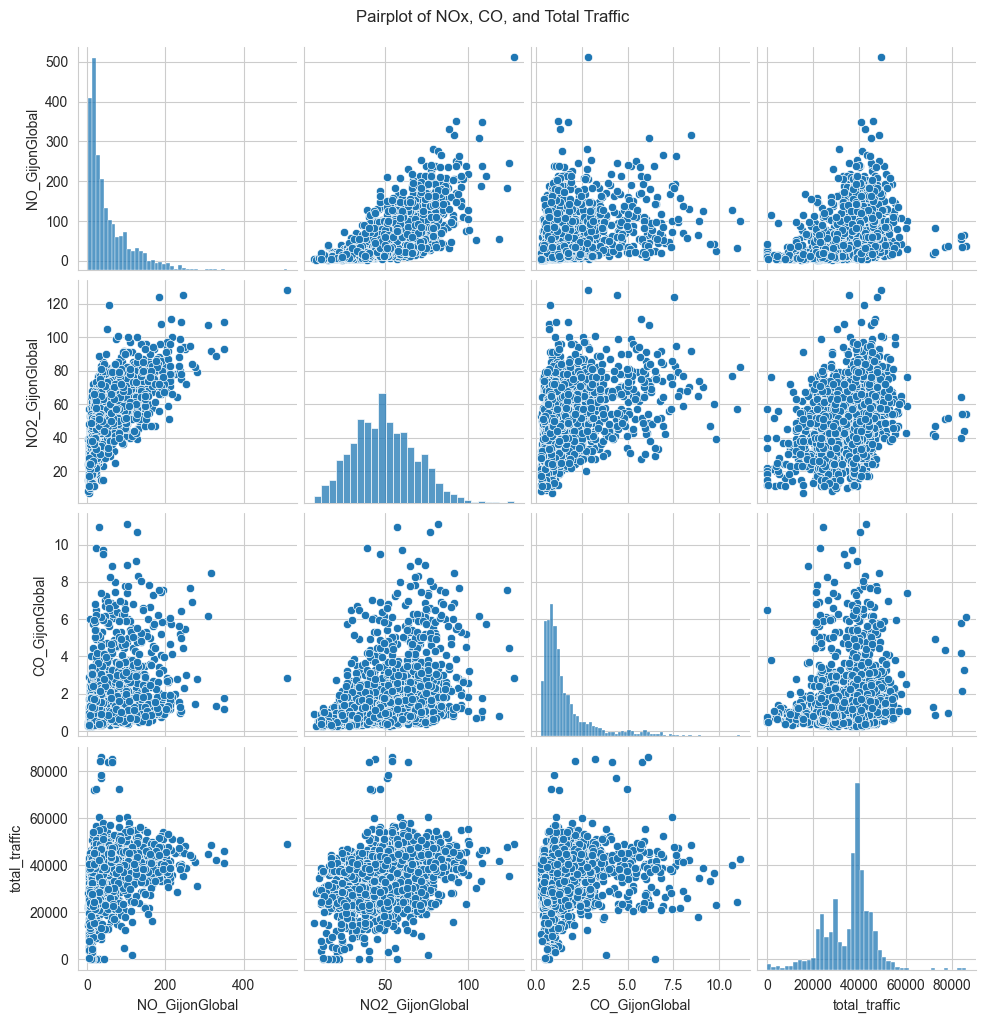

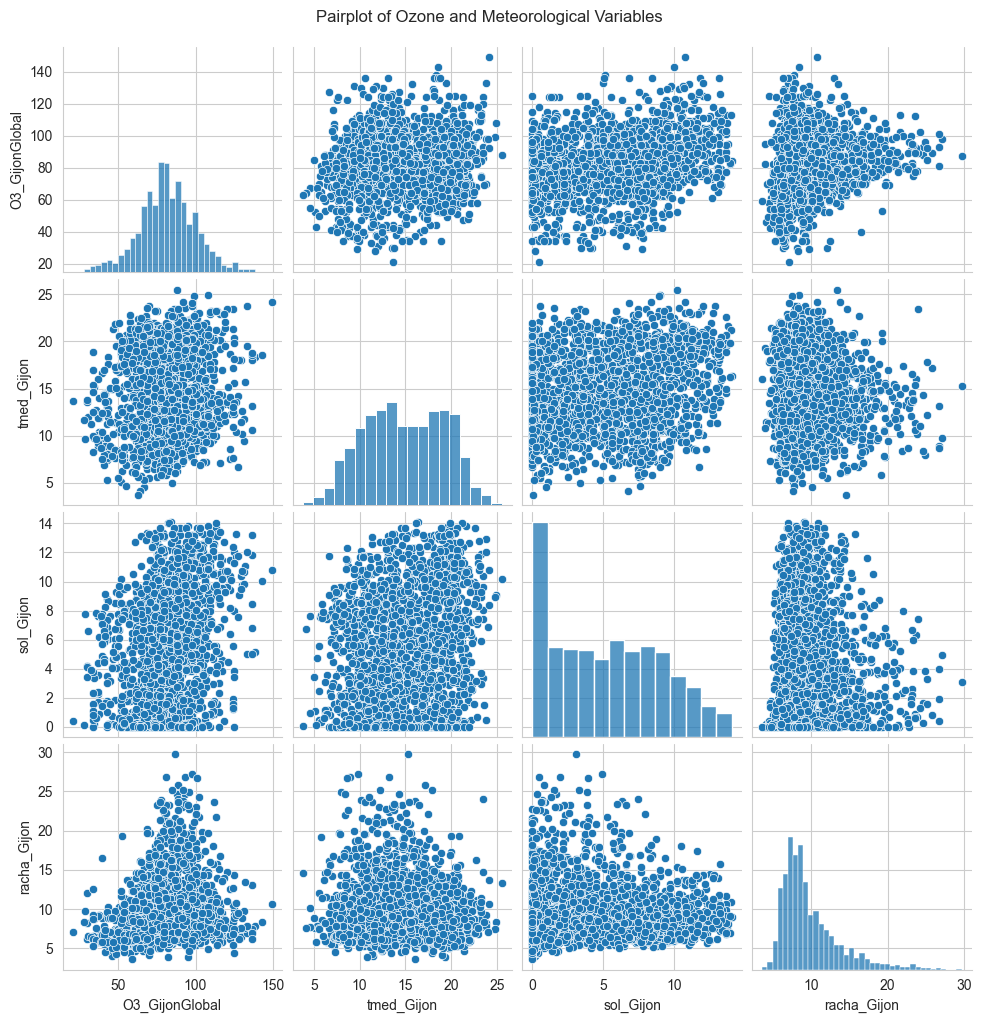

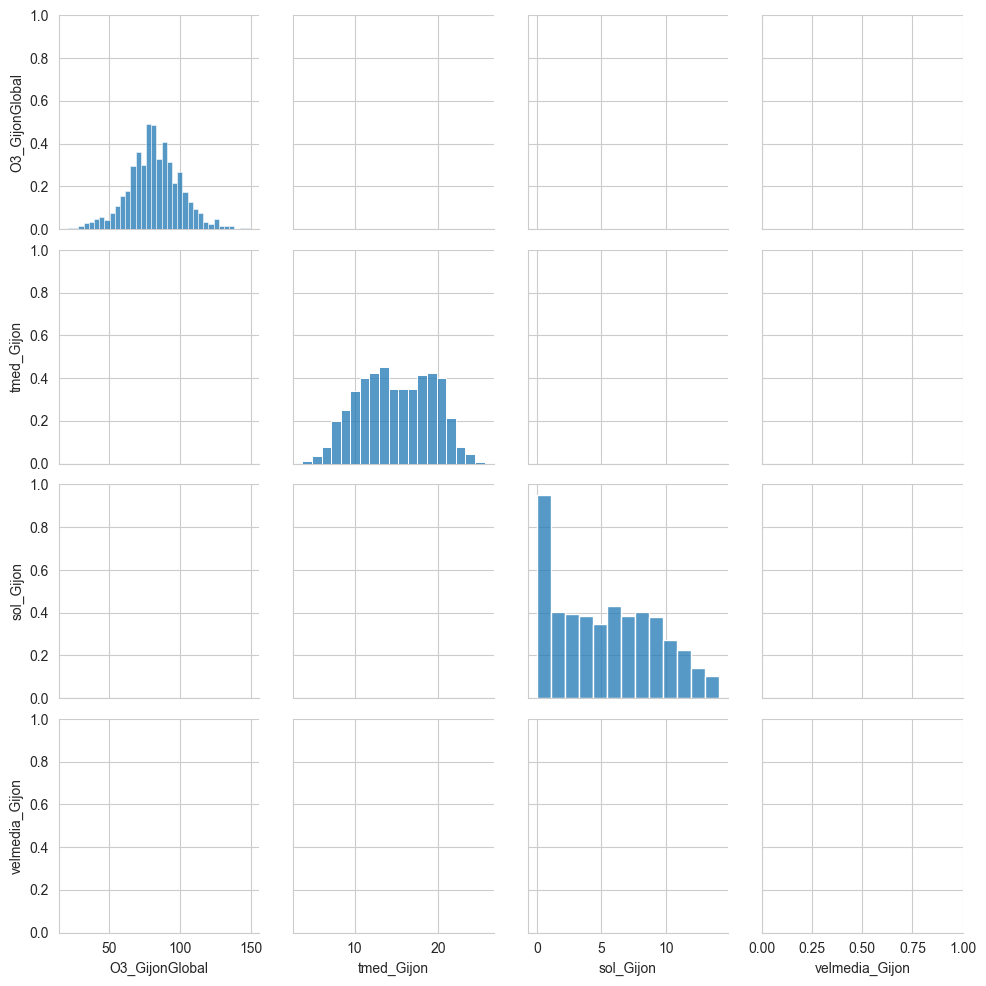

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the data for plotting
plot_data = merged_df[[
    'NO_GijonGlobal', 'NO2_GijonGlobal', 'CO_GijonGlobal', 
    'O3_GijonGlobal', 'tmed_Gijon', 'sol_Gijon', 'racha_Gijon', 
    'total_traffic', 'velmedia_Gijon'
]]

# Pairplot for NOx, CO, and traffic
sns.pairplot(plot_data, vars=['NO_GijonGlobal', 'NO2_GijonGlobal', 'CO_GijonGlobal', 'total_traffic'])
plt.suptitle('Pairplot of NOx, CO, and Total Traffic', y=1.02)

# Pairplot for O3 and meteorological variables
sns.pairplot(plot_data, vars=['O3_GijonGlobal', 'tmed_Gijon', 'sol_Gijon', 'racha_Gijon'])
plt.suptitle('Pairplot of Ozone and Meteorological Variables', y=1.02)

# Pairplot for O3 and meteorological variables
sns.pairplot(plot_data, vars=['O3_GijonGlobal', 'tmed_Gijon', 'sol_Gijon', 'velmedia_Gijon'])
plt.suptitle('Pairplot of Ozone and Meteorological Variables', y=1.02)

plt.show()
